# 21BIT0659
# Soumya Darshan Sukla

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy import stats

In [43]:
# Step 2: Load the dataset
data = pd.read_csv('penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


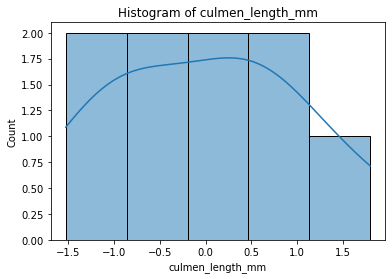

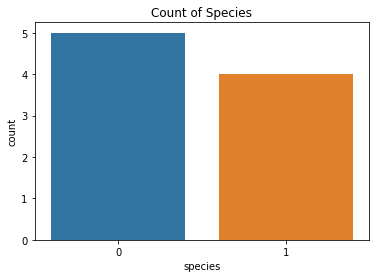

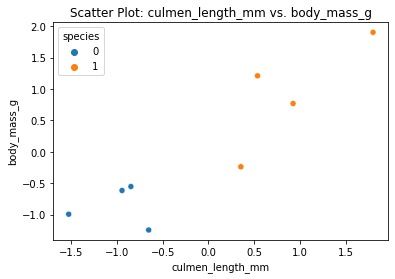

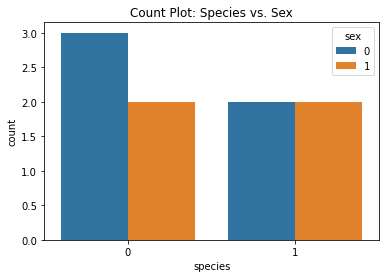

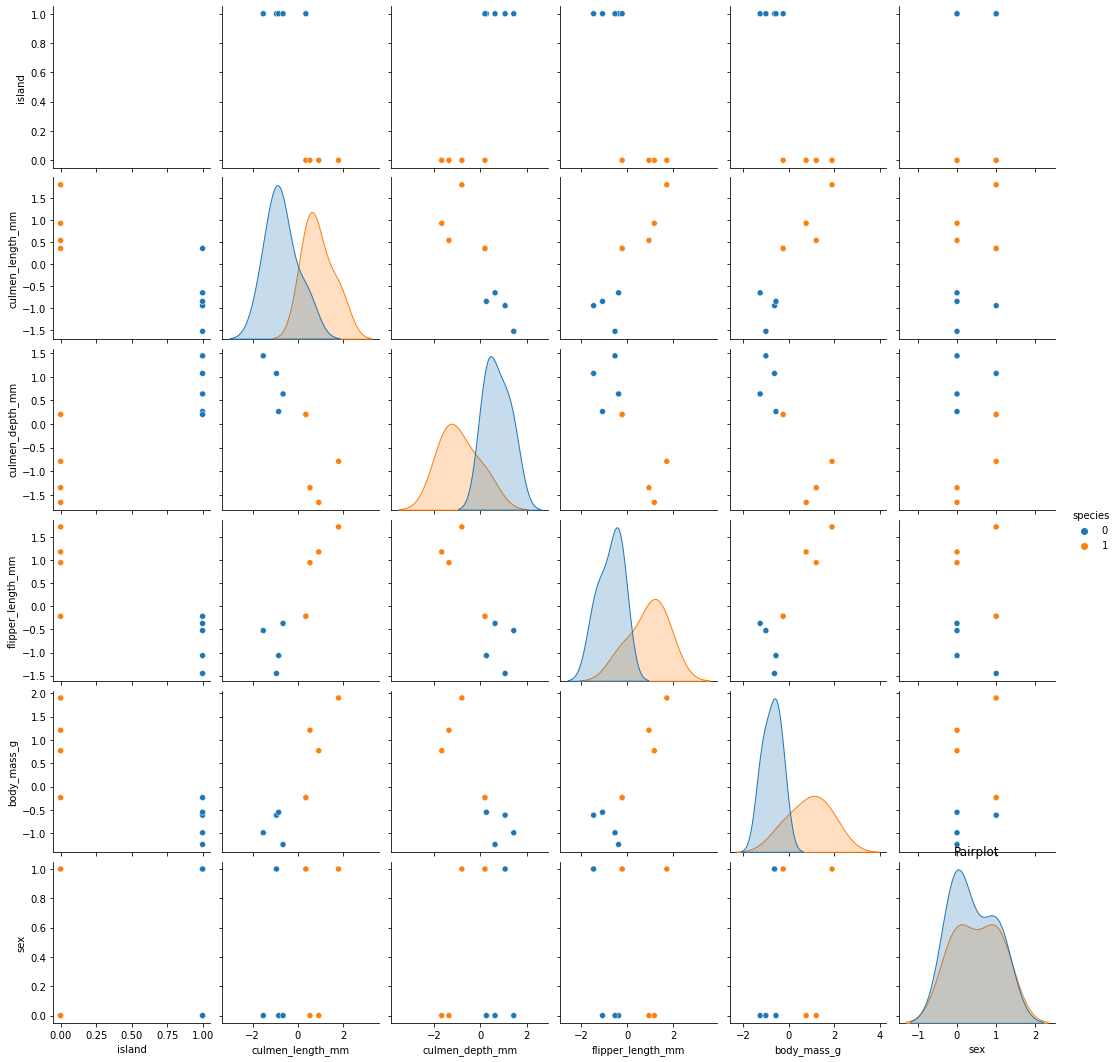

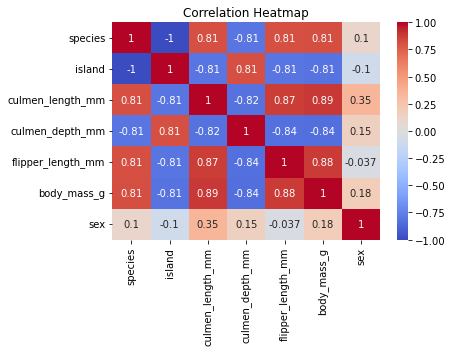

In [54]:
#Step 3: ● Univariate Analysis ● Bi- Variate Analysis ● Multi-Variate Analysis

# Univariate Analysis for Numeric Variable
sns.histplot(data=data_no_outliers, x='culmen_length_mm', kde=True)
plt.title('Histogram of culmen_length_mm')
plt.show()

# Univariate Analysis for Categorical Variable
sns.countplot(data=data_no_outliers, x='species')
plt.title('Count of Species')
plt.show()

# Bivariate Analysis
sns.scatterplot(data=data_no_outliers, x='culmen_length_mm', y='body_mass_g', hue='species')
plt.title('Scatter Plot: culmen_length_mm vs. body_mass_g')
plt.show()

# Bivariate Analysis
sns.countplot(data=data_no_outliers, x='species', hue='sex')
plt.title('Count Plot: Species vs. Sex')
plt.show()

# Multivariate Analysis: Pairplot
sns.pairplot(data=data_no_outliers, hue='species')
plt.title('Pairplot')
plt.show()

# Multivariate Analysis: Correlation Heatmap
correlation_matrix = data_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [44]:
# Step 4: Descriptive Statistics
description = data.describe()
description

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [45]:
# Step 5: Check for Missing Values and Deal with Them
missing_values = data.isnull().sum()
missing_values

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [46]:
#Handling Missing Values

#replacing statistical data with median
median_values = data.iloc[:,[2,3,4,5]].median()
data= data.fillna(median_values)

#replacing non statistical data with highest frequent data
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

#check null values
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [47]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,4050.0,MALE
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,FEMALE


In [55]:

label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'])

numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
z_scores = np.abs(stats.zscore(data[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)
data_no_outliers = data[~outliers]


correlation_matrix = data_no_outliers.corr()
correlation_with_target = correlation_matrix['species'].sort_values(ascending=False)

print("Correlation with Target:\n", correlation_with_target)

Correlation with Target:
 species              1.000000
body_mass_g          0.814420
flipper_length_mm    0.811719
culmen_length_mm     0.808600
sex                  0.100000
culmen_depth_mm     -0.806968
island              -1.000000
Name: species, dtype: float64


In [51]:

# Separate numeric and non-numeric columns
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = ['species', 'island', 'sex']

# Scaling the Data (Standardization) for numeric columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Perform encoding for categorical columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Split the data into dependent and independent variables
X = data.drop(columns=['species'])
y = data['species']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the training and testing data shape
print("\nTraining Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)



Training Data Shape: (7, 6) (7,)
Testing Data Shape: (2, 6) (2,)
